In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Two Features

## Create data

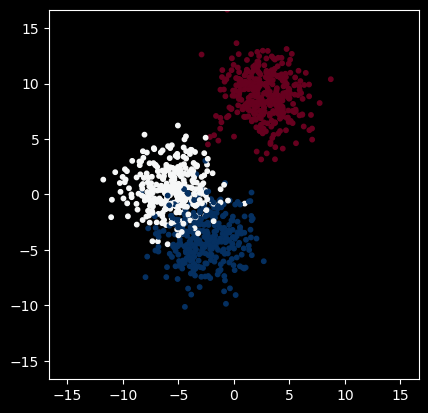

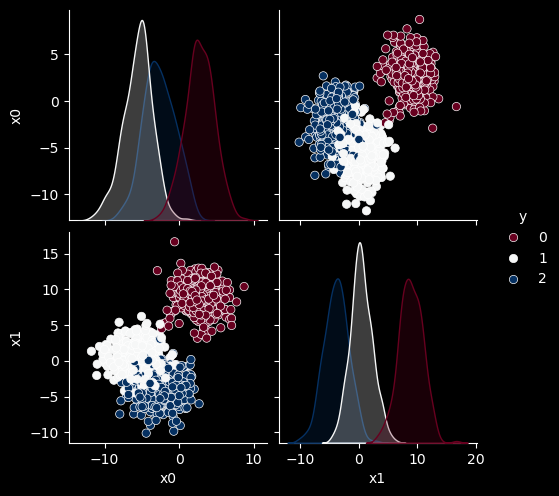

In [61]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=3,
    cluster_std=2.0,
    random_state=1
)

X = X - X.mean()

MAX = np.max(np.abs(X))

plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="RdBu");
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

## Modeling

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    334
1    333
2    333
Name: count, dtype: int64

Training data:
1    267
0    267
2    266
Name: count, dtype: int64

Testing data:
2    67
0    67
1    66
Name: count, dtype: int64


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train).astype(int)
y_test_pred  = model.predict(X_test).astype(int)

## Analysis

In [64]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

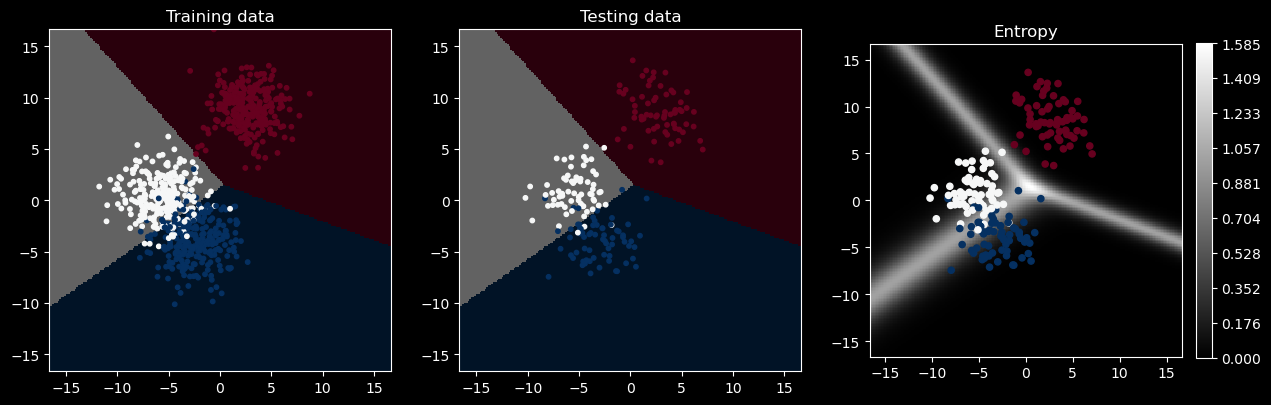

In [65]:
nGrid = 200
a1 = np.linspace(-MAX,MAX,nGrid)
a2 = np.linspace(-MAX,MAX,nGrid)

A1, A2 = np.meshgrid(a1,a2)
A1 = A1.flatten()
A2 = A2.flatten()
A = np.vstack((A1,A2)).T

B = model.predict(A)
B = B.reshape(nGrid,nGrid)
B = np.flipud(B)

prob_2D = model.predict_proba(A)
S = np.array([entropy(p, 2) for p in prob_2D])
S = S.reshape(nGrid,nGrid)
S = np.flipud(S)

extent = [-MAX,MAX,-MAX,MAX]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

cmap = "RdBu"
axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
axes[0].set_aspect('equal')
axes[0].set_title('Training data');

axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
axes[1].set_aspect('equal')
axes[1].set_title('Testing data');

im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
axes[2].set_aspect('equal')
axes[2].set_title('Entropy')
cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

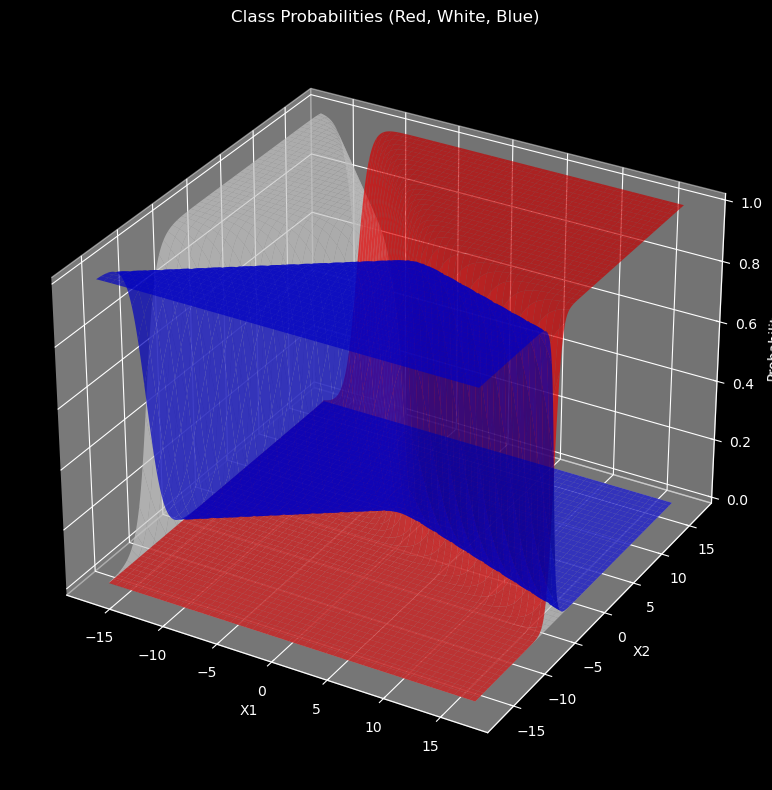

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# Reshape probabilities into the grid
prob_2D_reshaped = prob_2D.reshape(nGrid, nGrid, -1)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each class's surface in solid colors (Red, White, Blue)
colors = ['r', 'w', 'b']  # Red, White, Blue for each class

for i in range(prob_2D_reshaped.shape[2]):
    ax.plot_surface(A1.reshape(nGrid, nGrid), A2.reshape(nGrid, nGrid), prob_2D_reshaped[:, :, i],
                    color=colors[i], alpha=0.7, edgecolor='none')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability')
ax.set_title('Class Probabilities (Red, White, Blue)')

# Show the plot
plt.tight_layout()
plt.show()

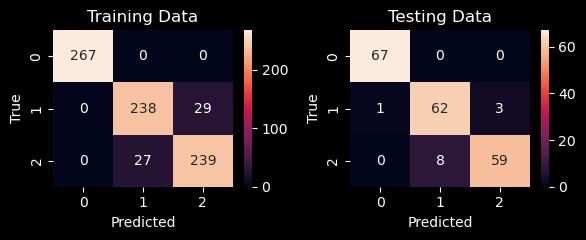

In [67]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [68]:
conf_matrix_train = conf_matrix_train.astype(float)
conf_matrix_test  = conf_matrix_test.astype(float)
for i in range(conf_matrix_train.shape[0]):
    conf_matrix_train[i,:] = conf_matrix_train[i,:] / conf_matrix_train[i,:].sum()
    conf_matrix_test[i,:]  = conf_matrix_test[i,:] / conf_matrix_test[i,:].sum()
# end

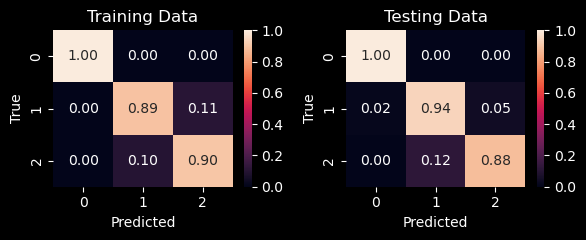

In [69]:
# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))

# Plot confusion matrix for training data
sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Training Data")

# Plot confusion matrix for test data
sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Testing Data")

# Show the plots
plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average=None)
recall = recall_score(y_train, y_train_pred, average=None)
f1 = f1_score(y_train, y_train_pred, average=None)

print("Training data:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1}")
print()

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)
f1_test = f1_score(y_test, y_test_pred, average=None)

print("Testing data:")
print(f"Accuracy:  {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall:    {recall_test}")
print(f"F1 Score:  {f1_test}")

Training data:
Accuracy:  0.9300
Precision: [1.         0.89811321 0.89179104]
Recall:    [1.         0.89138577 0.89849624]
F1 Score:  [1.         0.89473684 0.89513109]

Testing data:
Accuracy:  0.94
Precision: [0.98529412 0.88571429 0.9516129 ]
Recall:    [1.         0.93939394 0.88059701]
F1 Score:  [0.99259259 0.91176471 0.91472868]


In [71]:
from sklearn.metrics import precision_recall_fscore_support

precision_train, recall_train, f1_train, support_train = precision_recall_fscore_support(y_train, y_train_pred)

print("Training data:")
print(f"Precision: {precision_train}")
print(f"Recall:    {recall_train}")
print(f"F1 Score:  {f1_train}")
print(f"Support:   {support_train}")
print()

precision_test, recall_test, f1_test, support_test = precision_recall_fscore_support(y_test, y_test_pred)

print("Testing data:")
print(f"Precision: {precision_test}")
print(f"Recall:    {recall_test}")
print(f"F1 Score:  {f1_test}")
print(f"Support:   {support_test}")

Training data:
Precision: [1.         0.89811321 0.89179104]
Recall:    [1.         0.89138577 0.89849624]
F1 Score:  [1.         0.89473684 0.89513109]
Support:   [267 267 266]

Testing data:
Precision: [0.98529412 0.88571429 0.9516129 ]
Recall:    [1.         0.93939394 0.88059701]
F1 Score:  [0.99259259 0.91176471 0.91472868]
Support:   [67 66 67]


In [72]:
from sklearn.metrics import classification_report

print("Training Data:")
print(classification_report(y_train, y_train_pred))
print()
print("Testing Data:")
print(classification_report(y_test, y_test_pred))

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       0.90      0.89      0.89       267
           2       0.89      0.90      0.90       266

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800


Testing Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.89      0.94      0.91        66
           2       0.95      0.88      0.91        67

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

